In [2]:
import os
os.getcwd()

'/Users/maximilianjoas/development/autoencodix-reproducibility'

In [3]:
import pandas as pd
import torch
import os
f = os.path.join ("reports/Exp6_TCGA_METH_RNA/predicted_latent_space.parquet")
df = pd.read_parquet(f)

In [4]:
f = os.path.join("data/raw/data_clinical_formatted.parquet")
clin = pd.read_parquet(f)
clin.head()

,PATIENT_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,AJCC_PATHOLOGIC_TUMOR_STAGE_SHORT
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,TCGA-3X-AAV9,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,Yes,No,3X,Bile Duct,...,Yes,1:DECEASED,11.145083,1:DEAD WITH TUMOR,11.145083,1:Recurred/Progressed,7.101292,1:PROGRESSION,7.101292,STAGE I
TCGA-3X-AAVA-01,TCGA-3X-AAVA,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,Yes,No,3X,Bile Duct,...,Yes,1:DECEASED,14.629977,1:DEAD WITH TUMOR,14.629977,1:Recurred/Progressed,8.679357,1:PROGRESSION,8.679357,STAGE II
TCGA-3X-AAVB-01,TCGA-3X-AAVB,CHOL,Cholangiocarcinoma,Cholangiocarcinoma,"Cholangiocarcinoma, Distal",G1,No,Yes,3X,Bile Duct,...,Yes,0:LIVING,13.216294,0:ALIVE OR DEAD TUMOR FREE,13.216294,unknown,NaN,0:CENSORED,13.216294,STAGE IV
TCGA-3X-AAVC-01,TCGA-3X-AAVC,PHCH,Cholangiocarcinoma,Perihilar Cholangiocarcinoma,"Cholangiocarcinoma, Hilar/Perihilar",G3,No,Yes,3X,Bile Duct,...,Yes,0:LIVING,23.309334,0:ALIVE OR DEAD TUMOR FREE,23.309334,0:DiseaseFree,23.309334,0:CENSORED,23.309334,STAGE I
TCGA-3X-AAVE-01,TCGA-3X-AAVE,IHCH,Cholangiocarcinoma,Intrahepatic Cholangiocarcinoma,"Cholangiocarcinoma, Intrahepatic",G2,Yes,No,3X,Bile Duct,...,Yes,0:LIVING,21.369629,0:ALIVE OR DEAD TUMOR FREE,21.369629,0:DiseaseFree,21.369629,0:CENSORED,21.369629,STAGE II


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
TO_TCGA-DI-A2QT-01,-0.874976,0.464306,2.655204,0.986197,1.824074,-0.507537,0.250558,-0.417786,-1.005509,-0.258073,0.147831,0.755486
TO_TCGA-29-1710-01,0.209625,0.374099,-0.622326,-0.558789,-0.803714,-0.843494,0.125298,0.135664,0.606905,-0.761729,0.693439,-0.132886
TO_TCGA-AN-A0AK-01,1.109642,2.239170,-0.583302,-1.306681,1.363281,-0.321702,-0.548345,0.196078,-0.078804,0.170855,-0.758312,0.912436
TO_TCGA-66-2744-01,1.741528,0.092724,0.266726,1.148168,-0.557398,1.133609,-0.789957,-0.452564,0.526592,0.836244,0.317123,-0.811593
TO_TCGA-AQ-A04L-01,1.801400,0.354669,0.360370,-0.138614,-0.858382,-0.932145,0.870763,-0.472098,0.381989,0.309334,1.517741,1.681235


### Compare ML Taks for Varix and X-Modalix

In [27]:
import os
xmodal_id = "Exp6_TCGA_METH_RNA"
varix_id = "Exp6_TCGA_VARIX"
xml_task_file = os.path.join("reports", xmodal_id, "ml_task_performance.txt")
vml_task_file = os.path.join("reports", varix_id, "ml_task_performance.txt")

xml_df = pd.read_csv(xml_task_file, sep="\t")
vml_df = pd.read_csv(vml_task_file, sep="\t")

In [41]:
vml_df.head()

,score_split,CLINIC_PARAM,metric,value,ML_ALG,ML_TYPE,ML_TASK,ML_SUBTASK
0,train,CANCER_TYPE,roc_auc_ovo,0.872933,Linear,classification,Latent,Latent
1,valid,CANCER_TYPE,roc_auc_ovo,0.858561,Linear,classification,Latent,Latent
2,test,CANCER_TYPE,roc_auc_ovo,0.874700,Linear,classification,Latent,Latent
3,train,CANCER_TYPE,roc_auc_ovo,0.998012,RF,classification,Latent,Latent
4,valid,CANCER_TYPE,roc_auc_ovo,0.954947,RF,classification,Latent,Latent


In [37]:
xml_df.head()

,score_split,CLINIC_PARAM,metric,value,ML_ALG,ML_TYPE,ML_TASK,ML_SUBTASK
0,train,CANCER_TYPE,roc_auc_ovo,0.999912,Linear,classification,PCA,PCA
1,valid,CANCER_TYPE,roc_auc_ovo,0.999668,Linear,classification,PCA,PCA
2,test,CANCER_TYPE,roc_auc_ovo,0.999904,Linear,classification,PCA,PCA
3,train,CANCER_TYPE,roc_auc_ovo,0.999993,RF,classification,PCA,PCA
4,valid,CANCER_TYPE,roc_auc_ovo,0.999433,RF,classification,PCA,PCA


In [38]:
xml_df1 = xml_df[xml_df["score_split"] == "test"]
xml_df2 = xml_df1[xml_df1["CLINIC_PARAM"] == "CANCER_TYPE"]
# filter by ML_ALG
xml_df3 = xml_df2[xml_df2["ML_ALG"] == "RF"]
xml_df3.shape

(10, 8)

In [39]:
xml_df3

,score_split,CLINIC_PARAM,metric,value,ML_ALG,ML_TYPE,ML_TASK,ML_SUBTASK
5,test,CANCER_TYPE,roc_auc_ovo,0.998791,RF,classification,PCA,PCA
77,test,CANCER_TYPE,roc_auc_ovo,0.999075,RF,classification,UMAP,UMAP
149,test,CANCER_TYPE,roc_auc_ovo,0.984726,RF,classification,RandomFeature,RandomFeature1
221,test,CANCER_TYPE,roc_auc_ovo,0.984536,RF,classification,RandomFeature,RandomFeature2
293,test,CANCER_TYPE,roc_auc_ovo,0.962891,RF,classification,RandomFeature,RandomFeature3
365,test,CANCER_TYPE,roc_auc_ovo,0.976256,RF,classification,RandomFeature,RandomFeature4
437,test,CANCER_TYPE,roc_auc_ovo,0.981183,RF,classification,RandomFeature,RandomFeature5
509,test,CANCER_TYPE,roc_auc_ovo,0.688122,RF,classification,Latent_FROM,Latent_FROM
581,test,CANCER_TYPE,roc_auc_ovo,0.533763,RF,classification,Latent_TO,Latent_TO
653,test,CANCER_TYPE,roc_auc_ovo,0.590610,RF,classification,Latent_BOTH,Latent_BOTH


In [34]:
concated_df["ML_TASK"].value_counts()

ML_TASK
RandomFeature    720
PCA              144
UMAP             144
Latent_FROM       72
Latent_TO         72
Latent_BOTH       72
Latent            72
Name: count, dtype: int64

In [35]:
144 + 144 + 144 +144

576

In [33]:
concated_df = pd.concat([xml_df, vml_df]).reset_index(drop=True)
concated_df.head()

,score_split,CLINIC_PARAM,metric,value,ML_ALG,ML_TYPE,ML_TASK,ML_SUBTASK
0,train,CANCER_TYPE,roc_auc_ovo,0.999912,Linear,classification,PCA,PCA
1,valid,CANCER_TYPE,roc_auc_ovo,0.999668,Linear,classification,PCA,PCA
2,test,CANCER_TYPE,roc_auc_ovo,0.999904,Linear,classification,PCA,PCA
3,train,CANCER_TYPE,roc_auc_ovo,0.999993,RF,classification,PCA,PCA
4,valid,CANCER_TYPE,roc_auc_ovo,0.999433,RF,classification,PCA,PCA


In [32]:
ml_df = xml_df.groupby(["metric", "ML_TASK", "ML_ALG", "score_split", "CLINIC_PARAM"],
                       as_index=False).mean(numeric_only=True)
ml_std_df = xml_df.groupby(["metric", "ML_TASK", "ML_ALG", "score_split", "CLINIC_PARAM"],
                           as_index=False).std(numeric_only=True).loc[:,"value"]

In [30]:
ml_df.head()

,metric,ML_TASK,ML_ALG,score_split,CLINIC_PARAM,value
0,r2,Latent_BOTH,Linear,test,AGE,0.006018
1,r2,Latent_BOTH,Linear,test,ANEUPLOIDY_SCORE,0.003943
2,r2,Latent_BOTH,Linear,test,MSI_SCORE_MANTIS,0.009470
3,r2,Latent_BOTH,Linear,test,OS_MONTHS,-0.001579
4,r2,Latent_BOTH,Linear,test,TMB_NONSYNONYMOUS,-0.006234


Created plot for Linear
Created plot for RF

Summary Statistics by Embedding and Algorithm:
   ML_ALG           Embedding       mean    median        std  count
0  Linear  Cross-Modal (FROM)  -6.057065 -2.537348   9.059870     12
1  Linear    Cross-Modal (TO)  -8.898799 -3.110321  15.471638     12
2  Linear         Variational  -1.577241 -1.010732   2.332125     12
3      RF  Cross-Modal (FROM) -10.737290 -4.435919  15.431855     12
4      RF    Cross-Modal (TO) -14.630774 -4.764449  22.541206     12
5      RF         Variational   0.387030  0.141440   1.129600     12


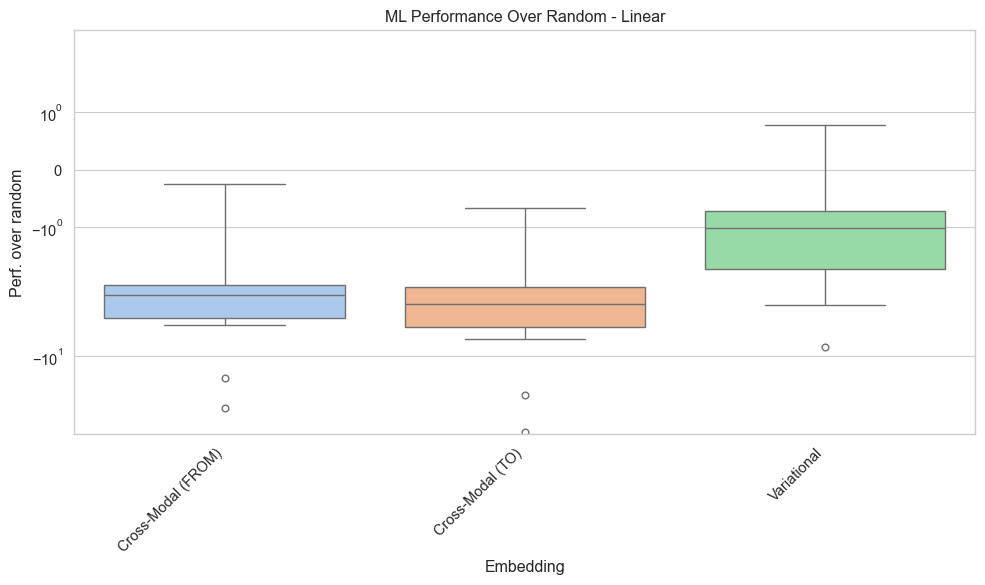

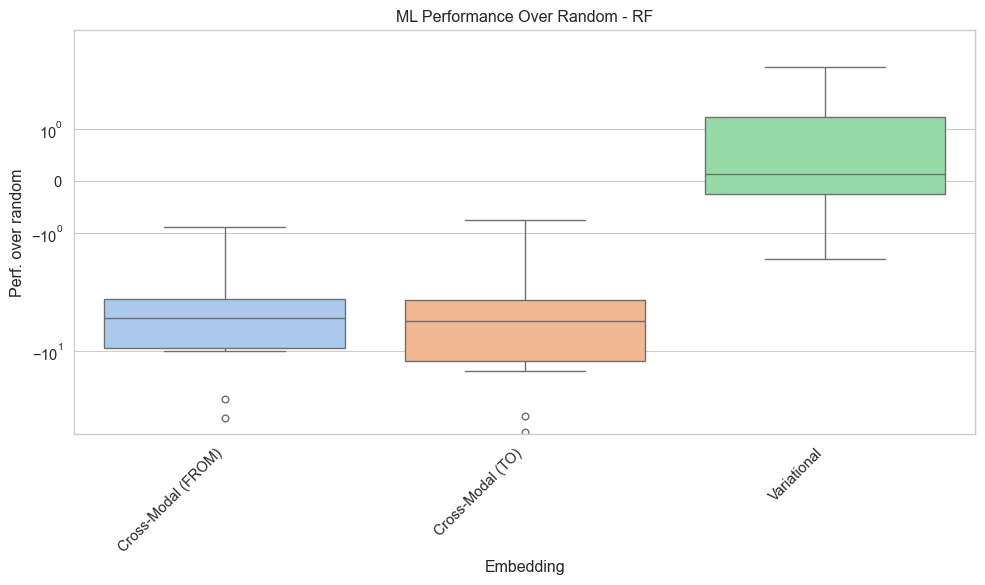

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
xmodal_id = "Exp6_TCGA_METH_RNA"
varix_id = "Exp6_TCGA_VARIX"
xml_task_file = os.path.join("reports", xmodal_id, "ml_task_performance.txt")
vml_task_file = os.path.join("reports", varix_id, "ml_task_performance.txt")

xml_df = pd.read_csv(xml_task_file, sep="\t")
vml_df = pd.read_csv(vml_task_file, sep="\t")
def calculate_perf_over_random(emb_df, rand_df, name):
    rows = []
    for alg in emb_df['ML_ALG'].unique():
        for param in emb_df['CLINIC_PARAM'].unique():
            for met in emb_df['metric'].unique():
                filtered_embedding_df = emb_df[(emb_df['ML_ALG']==alg)&
                           (emb_df['CLINIC_PARAM']==param)&
                           (emb_df['metric']==met)]
                filtered_random_df = rand_df[(rand_df['ML_ALG']==alg)&
                            (rand_df['CLINIC_PARAM']==param)&
                            (rand_df['metric']==met)]
                if filtered_embedding_df.empty or filtered_random_df.empty:
                    continue
                mu, stdev = filtered_random_df['value'].mean(), filtered_random_df['value'].std()
                stdev = stdev if stdev and not np.isnan(stdev) else 0.01
                for _, row in filtered_embedding_df.iterrows():
                    z = (row['value'] - mu) / stdev
                    rows.append({
                        'ML_ALG': alg,
                        'CLINIC_PARAM': param,
                        'Metric': met,
                        'Embedding': name,
                        'Perf. over random': z
                    })
    return pd.DataFrame(rows)


# keep only test split
xml_test = xml_df[xml_df['score_split']=='test']
vml_test = vml_df[vml_df['score_split']=='test']

# pick out tasks
latent_from_df = xml_test[xml_test['ML_TASK']=='Latent_FROM']
latent_to_df   = xml_test[xml_test['ML_TASK']=='Latent_TO']
xml_rand_df    = xml_test[xml_test['ML_TASK']=='RandomFeature']

varix_latent_df = vml_test[vml_test['ML_TASK']=='Latent']
vml_rand_df     = vml_test[vml_test['ML_TASK']=='RandomFeature']

# compute perf-over-random
from_perf  = calculate_perf_over_random(latent_from_df, xml_rand_df, 'Cross-Modal (FROM)')
to_perf    = calculate_perf_over_random(latent_to_df,   xml_rand_df, 'Cross-Modal (TO)')
varix_perf = calculate_perf_over_random(varix_latent_df, vml_rand_df,   'Variational')

all_perf = pd.concat([from_perf, to_perf, varix_perf])

# plot settings
sns.set_style("whitegrid")
for alg in ['Linear', 'RF']:
    df = all_perf[all_perf['ML_ALG']==alg]
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Embedding', y='Perf. over random',
                hue='Embedding', data=df, palette='pastel', legend=False)
    plt.title(f'ML Performance Over Random - {alg}')
    plt.yscale('symlog')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'ml_performance_{alg}.svg', bbox_inches='tight')
    plt.savefig(f'ml_performance_{alg}.png', dpi=300, bbox_inches='tight')
    print(f"Created plot for {alg}")
